<a href="https://colab.research.google.com/github/iharshikaagarwal/Machinelearning-/blob/main/House_price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XG-boost regressing algorith based (because we have less sized data set)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns


IMPORT the house price dataset                    

**hpd= house price dataset**

In [21]:
   hpd= sklearn.datasets.fetch_california_housing ()

In [22]:
print(hpd)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [23]:
#loading the dataset to a pandas dataframe
hpd_dataframe = pd.DataFrame(hpd.data,columns = hpd.feature_names)

In [24]:
hpd_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [25]:
#add target columns[price] to the dataframe
hpd_dataframe['price']=hpd.target

In [26]:
hpd_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
hpd_dataframe.shape

(20640, 9)

In [28]:
#checking the null  value
hpd_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


there is no missing value

In [29]:
#statistical measures of the dataset
hpd_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


understanding the co realtion between various features in the dataset


there are two type of corelation         Negative                                  positive

In [30]:
correlation = hpd_dataframe.corr()

<Axes: >

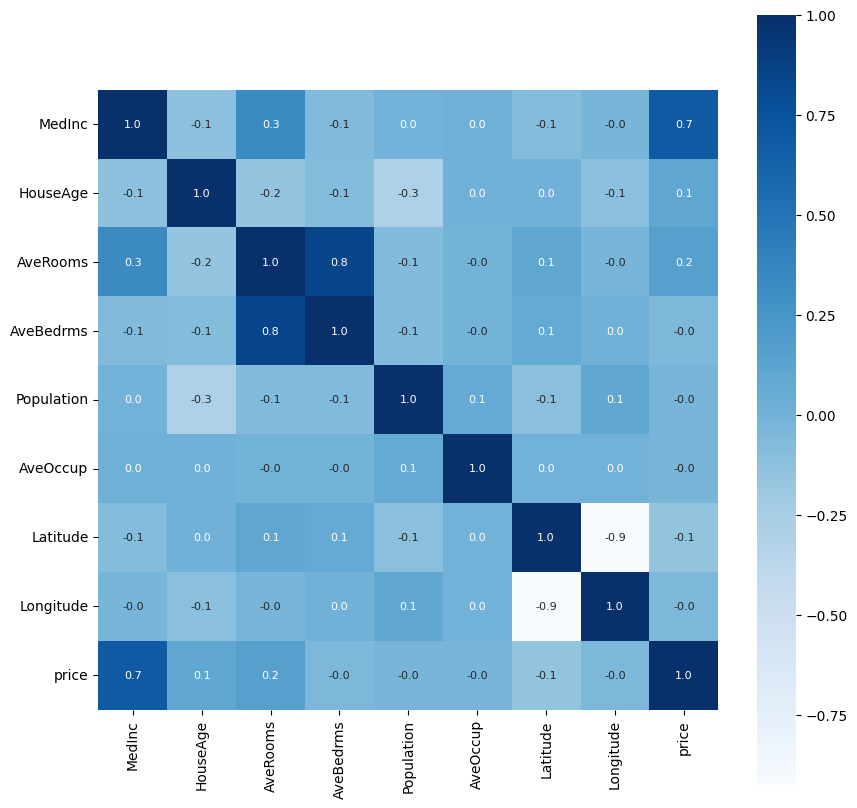

In [33]:
#constructing a heatmap to understand teh correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar =True , square = True ,fmt='.1f' , annot = True , annot_kws={'size':8},cmap='Blues')

Splitting the data in target

In [35]:
X= hpd_dataframe.drop(['price'],axis=1)
Y=hpd_dataframe['price']

In [36]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [37]:
X_train , X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [40]:
print(X_train.shape ,X_test.shape)
print(Y_train.shape ,Y_test.shape)


(16512, 8) (4128, 8)
(16512,) (4128,)


**Model training**

xgboost regression

In [41]:
#loading the model
model = XGBRegressor()

In [44]:
#training the model with x_train

model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

prediction on training model

In [45]:
#accuracy for prediction on traing data
training_data_prediction = model.predict(X_train)

In [46]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [49]:
# R square error
score_1=metrics.r2_score(Y_train ,  training_data_prediction)

#Mean absolute error


score_2=metrics.mean_absolute_error(Y_train , training_data_prediction)



print('R square error :',score_1)
print('mean absolute error :',score_2)

R square error : 0.943650140819218
mean absolute error : 0.1933648700612105


IF THE VALUE IS AROUND 5 + OR 10 MEANS THAT MEANS THE MODEL IS NOT MAKING GOOD PREDICTION

Visualizing the actual prices and predicted prices

Text(0.5, 1.0, 'Actual price vs predicted prices')

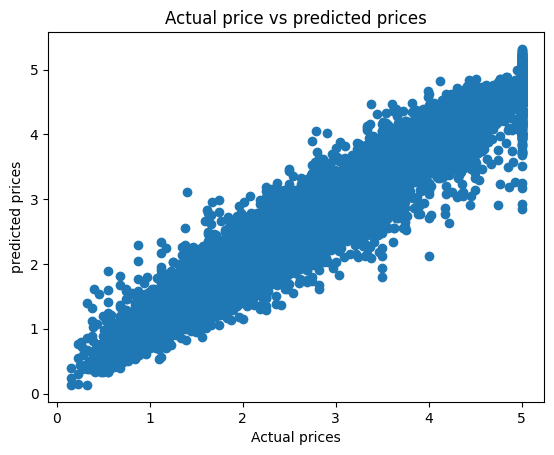

In [52]:
plt.scatter(Y_train , training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title("Actual price vs predicted prices")

**Prediction on test data**

In [50]:
testing_data_prediction = model.predict(X_test)

In [51]:
# R square error
score_1=metrics.r2_score(Y_test ,  testing_data_prediction)

#Mean absolute error


score_2=metrics.mean_absolute_error(Y_test , testing_data_prediction)



print('R square error :',score_1)
print('mean absolute error :',score_2)

R square error : 0.8338000331788725
mean absolute error : 0.3108631800268186
